In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

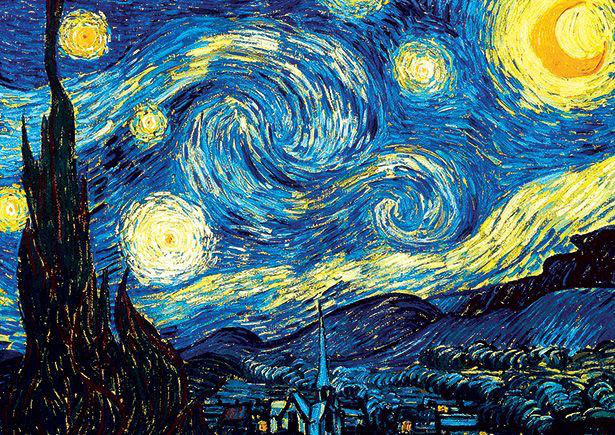

In [3]:
img = Image.open('Starry night.jpg')
img

In [4]:
X =np.mean(img, -1)
X

array([[ 53.33333333,  52.33333333,  60.33333333, ..., 120.        ,
         42.66666667,  82.66666667],
       [ 55.66666667,  78.66666667,  65.66666667, ..., 209.66666667,
         75.33333333,  67.33333333],
       [ 84.        ,  76.33333333,  83.        , ..., 204.66666667,
        141.        ,  76.33333333],
       ...,
       [ 17.33333333,   9.66666667,  12.66666667, ...,   4.33333333,
          4.33333333,  10.        ],
       [ 21.        ,  12.33333333,  16.66666667, ...,   8.33333333,
          5.66666667,  10.        ],
       [ 25.        ,  15.66666667,  19.66666667, ...,  13.33333333,
          8.33333333,   9.        ]])

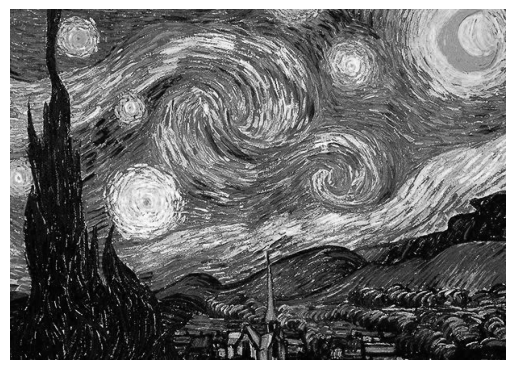

In [5]:
gray = plt.imshow(X)
gray.set_cmap('gray')
plt.axis('off')
plt.show()

In [6]:
U, S, VT = np.linalg.svd(X, full_matrices=False)  #S me da como vector 
S = np.diag(S)   #transformo el vector a una matriz diagonal

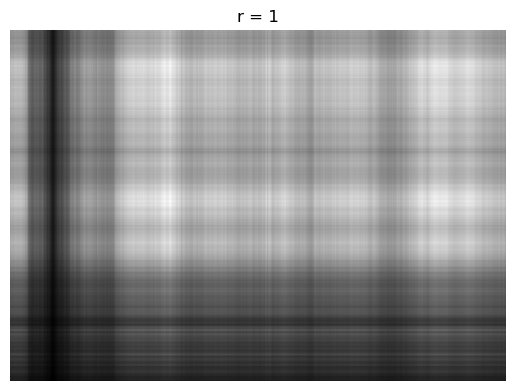

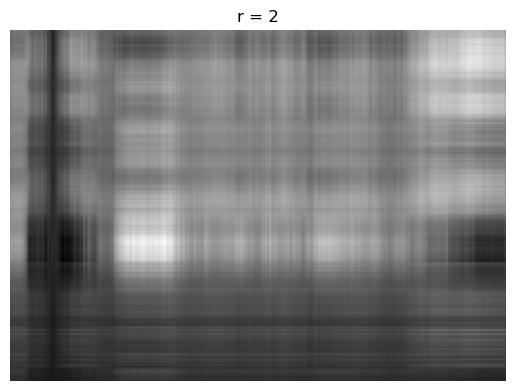

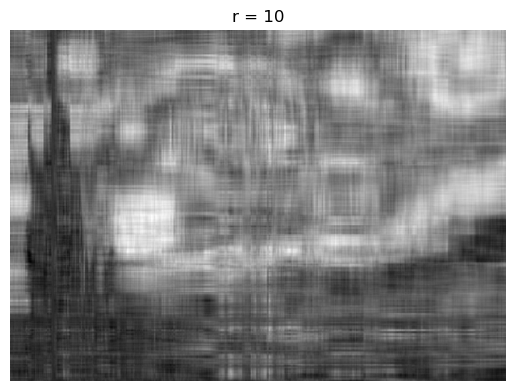

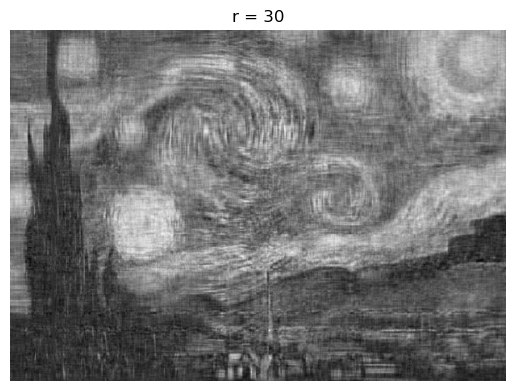

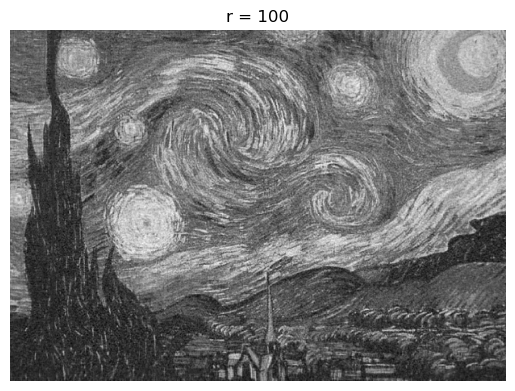

In [7]:
j = 0
singular_values = [1,2,10,30,100]
for r in singular_values:
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    gray = plt.imshow(Xapprox)
    gray.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [8]:
x = np.array(img, dtype=np.float32)

In [9]:
shape = np.shape(x)

In [10]:
bytes_original = shape[0]*shape[1]*shape[2]
print(f'Количество байтов исходного изображения: {bytes_original}')

Количество байтов исходного изображения: 802575


In [11]:
r = 100
Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
shape_comprimida = np.shape(Xapprox)
bytes_comprimida = shape_comprimida[0]*shape_comprimida[1]
print(f'Количество байтов сжатого изображения: {bytes_comprimida}')

Количество байтов сжатого изображения: 267525


In [13]:
Image.fromarray(np.asarray(Xapprox, dtype=np.uint8)).save(f'{r}.png')

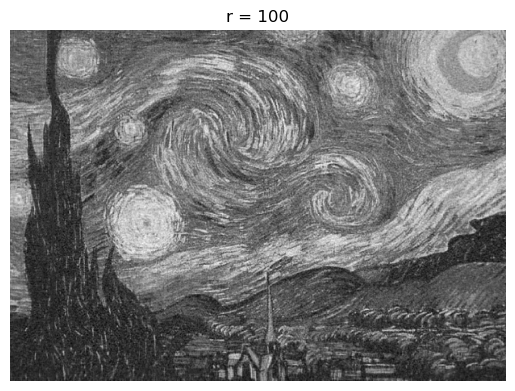

In [14]:
plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.title('r = ' + str(r))
plt.show()